In [1]:
# Ici charger les modules essentiels pour réaliser une analyse

## biblioteque pour charger les données numériques
import numpy as np 
## biblioteque pour charger les fichiers et panel data méme les requetes sql
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("PatisserieIN.csv",sep=";")

In [3]:
data.head()

,Année,Trimestre,Mois,Région,Gouvernorat,Délégation,Canal,Catégorie,Famille,Sous-Famille,...,DV Produit Gouvernorat,DV Référence Gouvernorat,DV Marque Délégation,DV Produit Délégation,DV Référence Délégation,Présence en Unités,Présence en Valeur,Visibilité,Part de visibilité,Prix Moyen
0,2017,2017-1,2017-01,Nord Ouest,Siliana,El Krib,Superette,EPICERIE,Epicerie sucrée,Patisserie Industrielle,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,2017,2017-1,2017-01,Nord Ouest,Siliana,Bourouis,Superette,EPICERIE,Epicerie sucrée,Patisserie Industrielle,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,2017,2017-1,2017-01,Nord Ouest,Siliana,Bargou,Superette,EPICERIE,Epicerie sucrée,Patisserie Industrielle,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,2017,2017-1,2017-01,Sud Est,Gabes,Gabes Ouest,Superette,EPICERIE,Epicerie sucrée,Patisserie Industrielle,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,2017,2017-1,2017-01,Sud Est,Gabes,Gabes Sud,Superette,EPICERIE,Epicerie sucrée,Patisserie Industrielle,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [4]:
data = data.dropna()

In [5]:
# Est ce qu'il est nécessaire de réduire et de center les données?
# Expliquer le rôle de cette étape
x = data.iloc[:,14:46].values
x

array([[9.45874002e-01, 9.69724771e-01, 8.71559633e-01, ...,
        5.34300000e+02, 1.23300000e+01, 1.88485900e-04],
       [9.45874002e-01, 9.69724771e-01, 6.67889908e-01, ...,
        3.23662500e+02, 8.22000000e+00, 1.25657300e-04],
       [9.45874002e-01, 9.69724771e-01, 8.82568807e-01, ...,
        1.43850000e+02, 4.11000000e+00, 6.28286000e-05],
       ...,
       [9.74937343e-01, 2.59445844e-01, 2.16624685e-01, ...,
        1.82954545e+02, 4.39090909e+00, 2.28828900e-04],
       [9.74937343e-01, 9.72292191e-01, 7.17884131e-01, ...,
        3.11022727e+02, 8.78181818e+00, 4.57657800e-04],
       [9.02255639e-01, 7.45591940e-01, 7.45591940e-01, ...,
        3.40295455e+02, 8.78181818e+00, 4.57657800e-04]])

In [6]:
# Diviser les données en deux lots 
# (un lot d'entrainement 80% et un lot de test 20%)
# Applying PCA
# scioentific kit for machine learning
from sklearn.model_selection import train_test_split
# Splitting the dataset into the Training set and Test set
X_train,X_test= train_test_split(x, test_size= 0.1, random_state= 0)

## Application PCA

In [9]:
# Center et réduire les données
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_


In [10]:
X_test.

array([[ 1150.6509043 ,    59.40279264],
       [  367.13711054,    46.79248136],
       [  979.0887696 ,    56.65107049],
       ...,
       [-1009.27986082,  -342.85826809],
       [ -871.12922018,   145.52569623],
       [ -617.86816418,   -24.23199853]])

In [41]:
X_test.shape

(5622, 2)

In [12]:
explained_variance

array([0.97751634, 0.02246393])

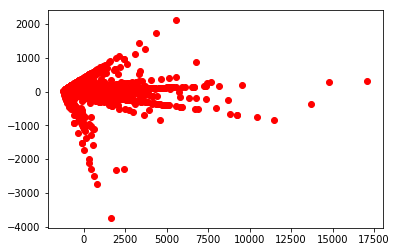

In [13]:
plt.scatter(X_test[:,0],X_test[:,1],color="red")
plt.show()

## KMEANS

In [14]:
from sklearn.cluster import KMeans

In [15]:
notre_premier_model = KMeans(n_clusters=5)

In [16]:
notre_premier_model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [17]:
notre_premier_model = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)

In [18]:
notre_premier_model.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [19]:
y_kmeans=notre_premier_model.predict(X_test)

In [20]:
y_kmeans

array([2, 3, 2, ..., 0, 0, 0])

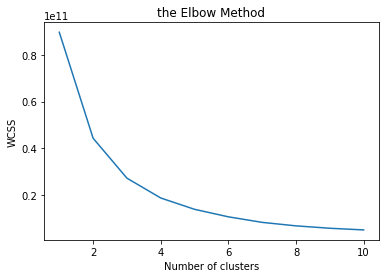

In [22]:
from sklearn.cluster import KMeans
# Using the elbow method to find the optimal number of clusters
### Here import kmeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title("the Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()
# add a title 'The Elbow Method'
#  add a label on x axis 'Number of clusters'
#  add a label on y axis 'WCSS'

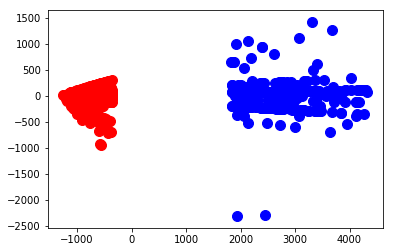

In [37]:
plt.scatter(X_test[y_kmeans == 0, 0], X_test[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_test[y_kmeans == 1, 0], X_test[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')


# ACH

In [25]:
from sklearn.preprocessing import StandardScaler

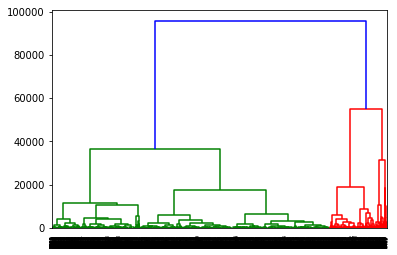

In [26]:
# Using the dendrogram to find the optimal number of clusters
# we use ward method
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_test, method = 'ward'))
plt.show()

In [39]:
# Fitting Hierarchical Clustering 
# here you specify the number of clusters 2, 3, 5,
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_test)

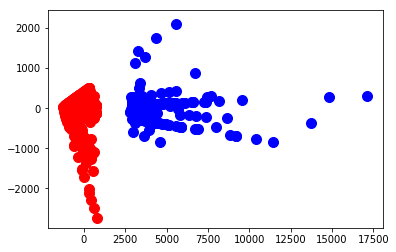

In [40]:
plt.scatter(X_test[y_hc == 0, 0], X_test[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_test[y_hc == 1, 0], X_test[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.show()